# Business Problem Statement

Airlines receive a large volume of passenger reviews across different routes, seat types, and traveler categories, but lack clear visibility into which aspects of the passenger experience most influence overall satisfaction and recommendation decisions.

The business problem is to identify the key drivers of passenger dissatisfaction and recommendation behavior by analyzing review ratings and contextual flight information, so that airlines can prioritize improvements in the areas that have the greatest impact on customer experience and market perception.

# About the Data

The dataset contains airline passenger review information, where each record represents one passenger’s experience for a specific flight.
It combines numerical ratings, categorical descriptors, and textual feedback, allowing analysis of passenger satisfaction from multiple perspectives.

The data captures:

Airline-level information (which airline was reviewed)

Passenger context (type of traveller, seat type, route, aircraft)

Experience ratings across multiple service dimensions

Overall satisfaction outcome and recommendation decision

Time-related details (date flown and review date)

Verification status of reviews

## importing libraries 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
airline_data = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Port folio project 4\airline_review.csv")
airline_data.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,alaska-airlines,2,"""steer clear of this airline""",20-12-2025,True,"Terrible. Boarded the plane an hour late, wi...",NaN,Business,Economy Class,Seattle to Indianapolis,01-12-2025,1.0,1.0,NaN,1.0,NaN,NaN,1.0,False
1,alaska-airlines,2,"""the least professional crew""",04-11-2025,True,I encountered the rudest possible flight at...,NaN,Solo Leisure,Economy Class,San Jose to Los Angeles,01-11-2025,3.0,1.0,NaN,1.0,NaN,5.0,2.0,False
2,alaska-airlines,2,"""no reason to be that rude""",16-09-2025,True,"Our flight was departing at 9AM, we have con...",NaN,Solo Leisure,Economy Class,San Francisco to Orlando via San Diego,01-09-2025,NaN,NaN,NaN,1.0,NaN,NaN,1.0,False
3,alaska-airlines,2,"""claim wasn't filed in 24 hours""",08-09-2025,True,After checking my bag at the gate with Alas...,NaN,Business,Economy Class,Redmond to Las Vegas,01-07-2025,1.0,4.0,1.0,1.0,1.0,1.0,1.0,False
4,alaska-airlines,4,"""amaturish nature of staff""",03-08-2025,True,Â The most annoying thing about Alaska Airline...,Boeing 737,Solo Leisure,First Class,Seattle to Dallas,01-08-2025,2.0,1.0,1.0,1.0,1.0,NaN,2.0,False


In [4]:
airline_data.shape

(29188, 19)

In [5]:
airline_data.columns

Index(['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date',
       'Verified', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
       'Wifi & Connectivity', 'Value For Money', 'Recommended'],
      dtype='object')

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29188 entries, 0 to 29187
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            29188 non-null  object 
 1   Overall_Rating          29188 non-null  int64  
 2   Review_Title            29188 non-null  object 
 3   Review Date             29188 non-null  object 
 4   Verified                29188 non-null  bool   
 5   Review                  29188 non-null  object 
 6   Aircraft                5032 non-null   object 
 7   Type Of Traveller       27569 non-null  object 
 8   Seat Type               28750 non-null  object 
 9   Route                   27352 non-null  object 
 10  Date Flown              27542 non-null  object 
 11  Seat Comfort            27266 non-null  float64
 12  Cabin Staff Service     27134 non-null  float64
 13  Food & Beverages        18550 non-null  float64
 14  Ground Service          26676 non-null

# DATA CLEANING 

In [11]:
airline_data.isnull().sum()

Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  24156
Type Of Traveller          1619
Seat Type                   438
Route                      1836
Date Flown                 1646
Seat Comfort               1922
Cabin Staff Service        2054
Food & Beverages          10638
Ground Service             2512
Inflight Entertainment    13349
Wifi & Connectivity       16281
Value For Money               3
Recommended                   0
dtype: int64

In [12]:
airline_data = airline_data.drop(columns = ["Aircraft","Review"])

In [13]:
airline_data.isnull().sum()

Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Type Of Traveller          1619
Seat Type                   438
Route                      1836
Date Flown                 1646
Seat Comfort               1922
Cabin Staff Service        2054
Food & Beverages          10638
Ground Service             2512
Inflight Entertainment    13349
Wifi & Connectivity       16281
Value For Money               3
Recommended                   0
dtype: int64

Missing values are retained because they reflect passenger choice rather than data errors. Not all passengers rate every service they experience. Dropping rows would result in significant data loss, and imputing values would introduce artificial information, which could bias the analysis.

In [15]:
airline_data.duplicated().sum()

np.int64(121)

In [16]:
airline_data = airline_data.drop_duplicates()

In [19]:
airline_data["Review Date"] = pd.to_datetime(airline_data["Review Date"],errors = "coerce")
airline_data["Date Flown"] = pd.to_datetime(airline_data["Date Flown"],format = "%B%Y",errors = "coerce")

In [20]:
airline_data.columns = (
        airline_data.columns
        .str.strip()
        .str.lower()
        .str.replace(" ","_")
        .str.replace("&","and")
)

In [24]:
airline_data.columns

Index(['airline_name', 'overall_rating', 'review_title', 'review_date',
       'verified', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_and_beverages',
       'ground_service', 'inflight_entertainment', 'wifi_and_connectivity',
       'value_for_money', 'recommended'],
      dtype='object')

# Solving Buisness Question

## Q.1::How are Overall_Rating values distributed across all reviews?


In [26]:
print(airline_data["overall_rating"].describe())
print("\nOverall Rating Counts:")
print(airline_data["overall_rating"].value_counts().sort_index())

count    29067.000000
mean         3.002580
std          2.093106
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: overall_rating, dtype: float64

Overall Rating Counts:
overall_rating
2     20396
3      3275
4      1516
5       642
6       510
7       319
8       550
9       898
10      961
Name: count, dtype: int64


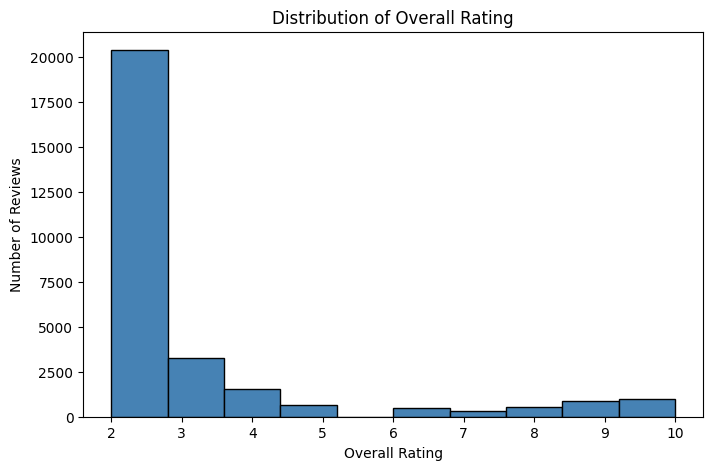

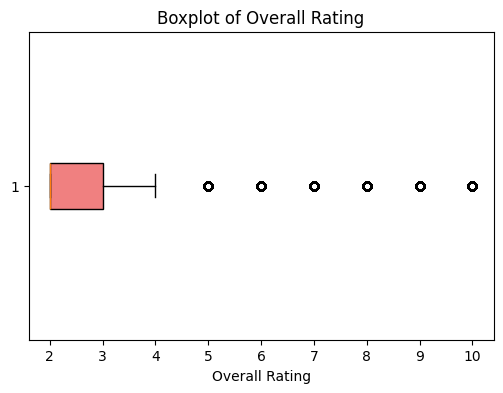

In [28]:
plt.figure(figsize=(8,5))
plt.hist(
    airline_data["overall_rating"],
    bins=10,
    color="steelblue",
    edgecolor="black"
)
plt.title("Distribution of Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(
    airline_data["overall_rating"],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightcoral")
)
plt.title("Boxplot of Overall Rating")
plt.xlabel("Overall Rating")
plt.show()

## Q.2::How does Overall_Rating vary across different Airline Name values?

In [29]:
airline_rating_summary = (
    airline_data
    .groupby("airline_name")["overall_rating"]
    .agg(["count", "mean", "median"])
    .sort_values("count", ascending=False)
)
print("Overall Rating Summary by Airline (Top 10 by Review Count):\n")
print(airline_rating_summary.head(10))

Overall Rating Summary by Airline (Top 10 by Review Count):

                    count      mean  median
airline_name                               
american-airlines    6083  2.956600     2.0
united-airlines      5097  3.291348     2.0
spirit-airlines      4874  2.661264     2.0
frontier-airlines    3439  2.386159     2.0
delta-air-lines      2804  3.539943     2.0
southwest-airlines   1619  3.488573     2.0
allegiant-air        1602  2.799001     2.0
jetblue-airways      1479  2.958080     2.0
alaska-airlines       814  3.487715     2.0
breeze-airways        416  3.132212     2.0


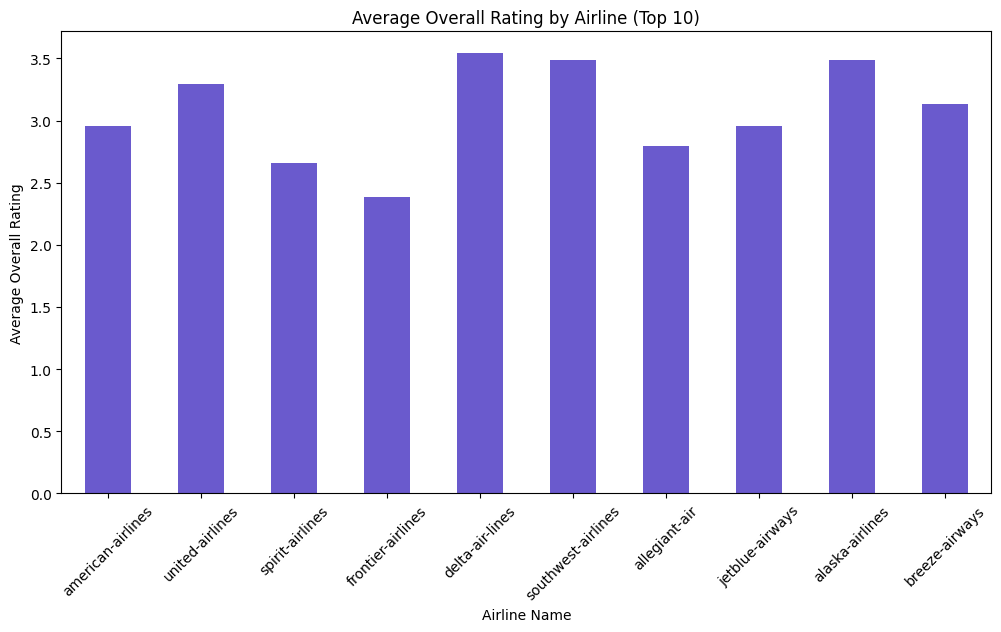

In [32]:
top_airlines = airline_rating_summary.head(10).index

plot_data = airline_data[
    airline_data["airline_name"].isin(top_airlines)
]
plt.figure(figsize=(12,6))
airline_rating_summary.loc[top_airlines, "mean"].plot(
    kind="bar",
    color="slateblue"
)
plt.title("Average Overall Rating by Airline (Top 10)")
plt.xlabel("Airline Name")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=45)
plt.show()

## Q.3::How do individual service ratings (Seat Comfort, Cabin Staff Service, Food & Beverages, Ground Service, Inflight Entertainment, Wifi & Connectivity, Value For Money) vary in general?

In [33]:
service_cols = [
    "seat_comfort",
    "cabin_staff_service",
    "food_and_beverages",
    "ground_service",
    "inflight_entertainment",
    "wifi_and_connectivity",
    "value_for_money"
]
print("Service Rating Summary Statistics:\n")
print(airline_data[service_cols].describe())

service_means = airline_data[service_cols].mean().sort_values(ascending=False)
print("\nAverage Rating by Service:\n")
print(service_means)

Service Rating Summary Statistics:

       seat_comfort  cabin_staff_service  food_and_beverages  ground_service  \
count   27145.00000         27013.000000        18429.000000    26675.000000   
mean        2.04266             2.309259            1.969070        1.816682   
std         1.31383             1.498685            1.333933        1.378636   
min         0.00000             0.000000            0.000000        1.000000   
25%         1.00000             1.000000            1.000000        1.000000   
50%         1.00000             2.000000            1.000000        1.000000   
75%         3.00000             3.000000            3.000000        2.000000   
max         5.00000             5.000000            5.000000        5.000000   

       inflight_entertainment  wifi_and_connectivity  value_for_money  
count            15718.000000           12907.000000     29064.000000  
mean                 1.988803               1.773844         1.830168  
std                  1.4111

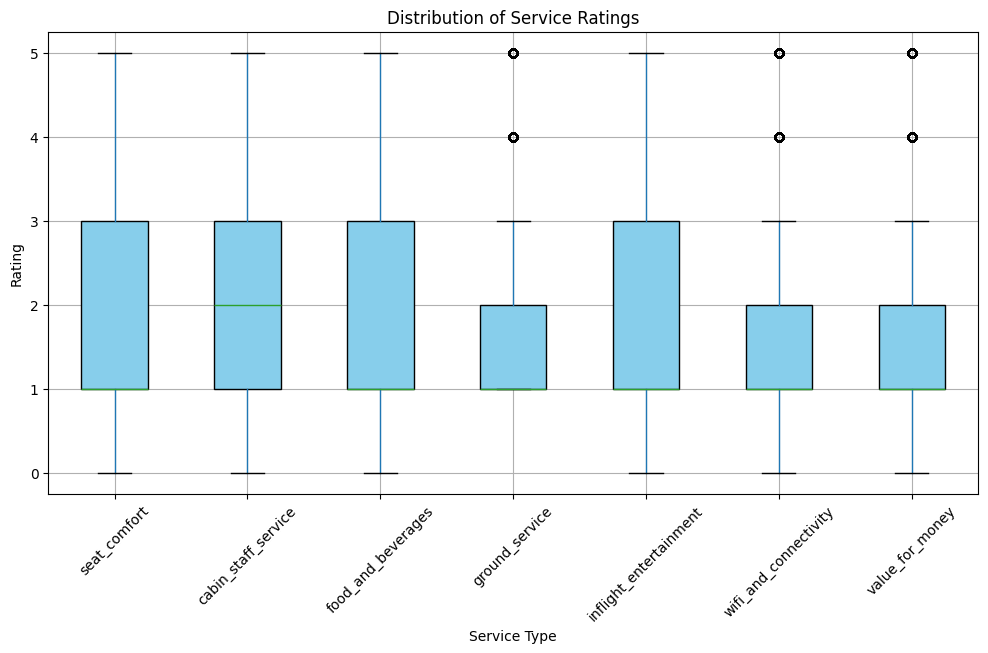

In [34]:
# Boxplot for service rating distribution
plt.figure(figsize=(12,6))
airline_data[service_cols].boxplot(
    patch_artist=True,
    boxprops=dict(facecolor="skyblue")
)
plt.title("Distribution of Service Ratings")
plt.xlabel("Service Type")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

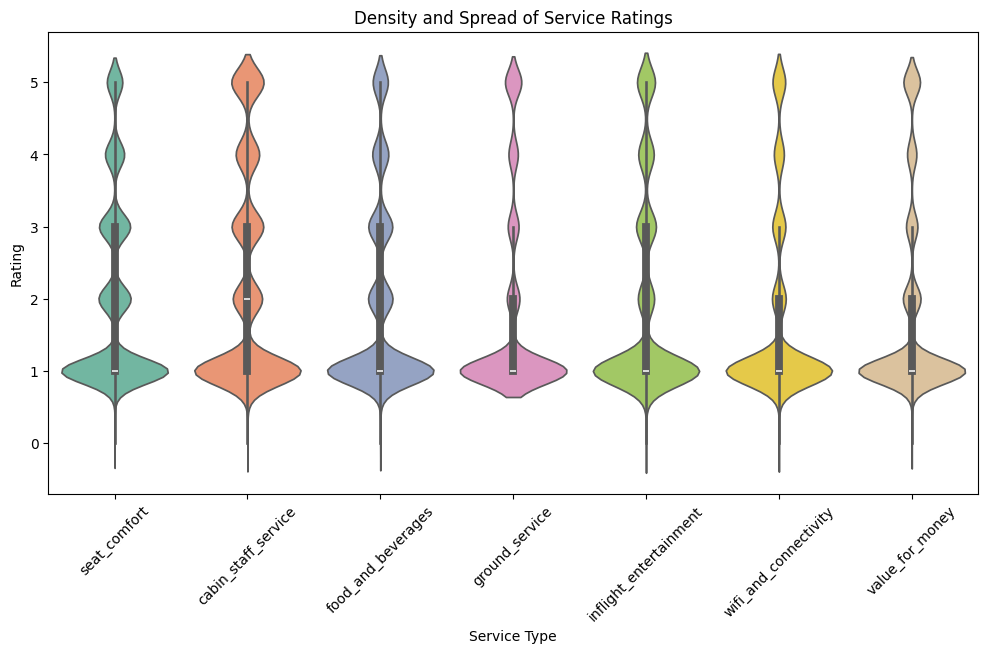

In [35]:
# Violin plot to show density and spread
plt.figure(figsize=(12,6))
sns.violinplot(
    data=airline_data[service_cols],
    palette="Set2"
)
plt.title("Density and Spread of Service Ratings")
plt.xlabel("Service Type")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

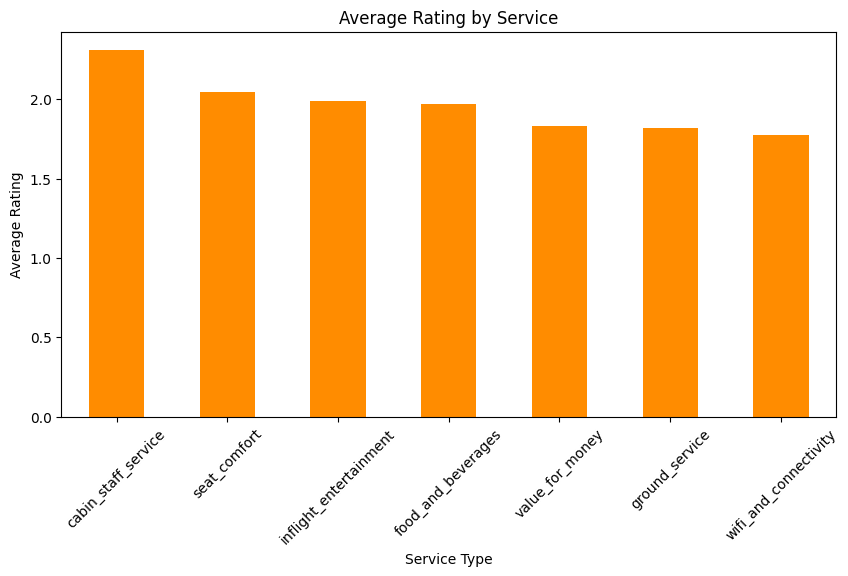

In [36]:
# Bar chart of average ratings
plt.figure(figsize=(10,5))
service_means.plot(
    kind="bar",
    color="darkorange"
)
plt.title("Average Rating by Service")
plt.xlabel("Service Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

## Q.4::How does Overall_Rating differ across Type Of Traveller categories?

In [37]:
traveller_rating_summary = (
    airline_data
    .groupby("type_of_traveller")["overall_rating"]
    .agg(["count", "mean", "median"])
    .sort_values("count", ascending=False)
)
print("Overall Rating by Type Of Traveller:\n")
print(traveller_rating_summary)

Overall Rating by Type Of Traveller:

                   count      mean  median
type_of_traveller                         
Solo Leisure        8987  3.080004     2.0
Family Leisure      7783  2.815752     2.0
Couple Leisure      6814  2.929850     2.0
Business            3984  2.936496     2.0


<Figure size 1000x600 with 0 Axes>

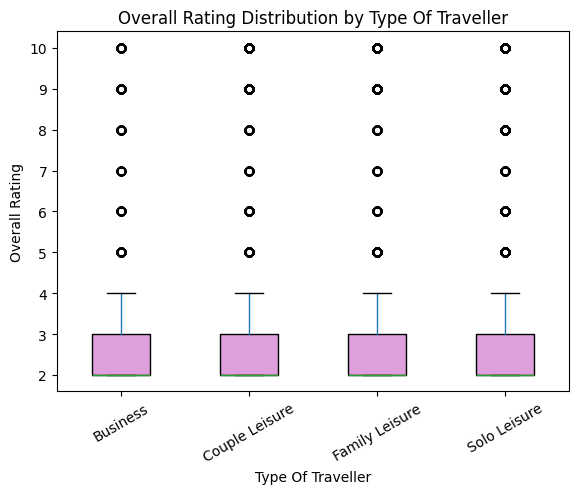

In [38]:
# Boxplot to show distribution
plt.figure(figsize=(10,6))
airline_data.boxplot(
    column="overall_rating",
    by="type_of_traveller",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="plum")
)
plt.title("Overall Rating Distribution by Type Of Traveller")
plt.suptitle("")
plt.xlabel("Type Of Traveller")
plt.ylabel("Overall Rating")
plt.xticks(rotation=30)
plt.show()

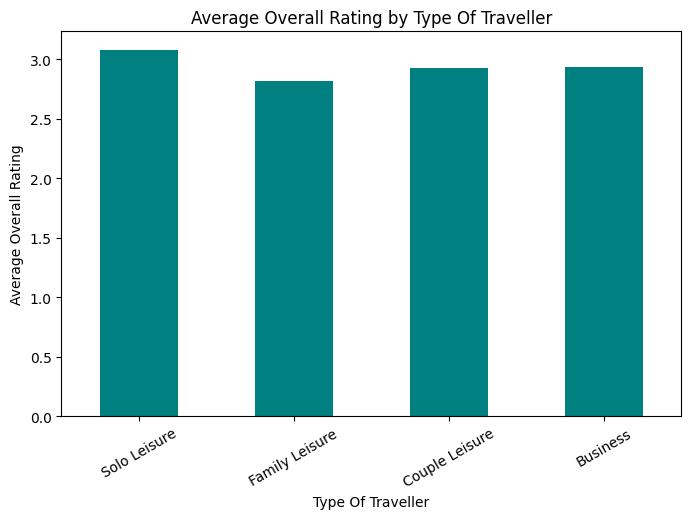

In [39]:
# Bar chart of average overall rating
plt.figure(figsize=(8,5))
traveller_rating_summary["mean"].plot(
    kind="bar",
    color="teal"
)
plt.title("Average Overall Rating by Type Of Traveller")
plt.xlabel("Type Of Traveller")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=30)
plt.show()

## Q.5::How does Overall_Rating vary by Seat Type?

In [40]:
seat_rating_summary = (
    airline_data
    .groupby("seat_type")["overall_rating"]
    .agg(["count", "mean", "median"])
    .sort_values("count", ascending=False)
)
print("Overall Rating by Seat Type:\n")
print(seat_rating_summary)

Overall Rating by Seat Type:

                 count      mean  median
seat_type                               
Economy Class    25168  2.865424     2.0
Premium Economy   1353  3.434590     2.0
First Class       1151  4.070374     2.0
Business Class    1044  4.454023     3.0


<Figure size 800x500 with 0 Axes>

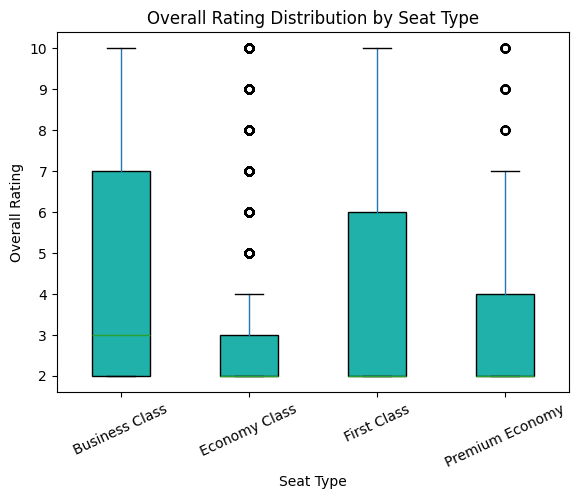

In [41]:
# Boxplot to show distribution
plt.figure(figsize=(8,5))
airline_data.boxplot(
    column="overall_rating",
    by="seat_type",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightseagreen")
)
plt.title("Overall Rating Distribution by Seat Type")
plt.suptitle("")
plt.xlabel("Seat Type")
plt.ylabel("Overall Rating")
plt.xticks(rotation=25)
plt.show()

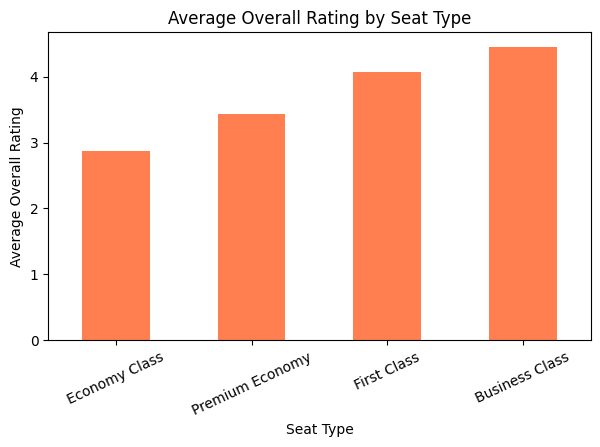

In [42]:
# Bar chart of average overall rating
plt.figure(figsize=(7,4))
seat_rating_summary["mean"].plot(
    kind="bar",
    color="coral"
)
plt.title("Average Overall Rating by Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=25)
plt.show()

## Q.6::What proportion of reviews are marked as Recommended = Yes vs No?

In [43]:
recommendation_counts = airline_data["recommended"].value_counts()
recommendation_percentage = airline_data["recommended"].value_counts(normalize=True) * 100

print("Recommendation Counts:\n")
print(recommendation_counts)

print("\nRecommendation Percentage (%):\n")
print(recommendation_percentage.round(2))

Recommendation Counts:

recommended
False    24148
True      4919
Name: count, dtype: int64

Recommendation Percentage (%):

recommended
False    83.08
True     16.92
Name: proportion, dtype: float64


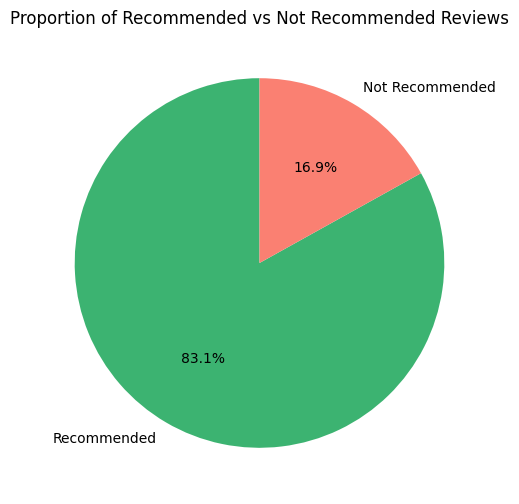

In [44]:
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    recommendation_counts,
    labels=["Recommended", "Not Recommended"],
    autopct="%1.1f%%",
    colors=["mediumseagreen", "salmon"],
    startangle=90
)
plt.title("Proportion of Recommended vs Not Recommended Reviews")
plt.show()

## Q.7::How does Overall_Rating differ between Verified and Non-Verified reviews?

In [45]:
verified_rating_summary = (
    airline_data
    .groupby("verified")["overall_rating"]
    .agg(["count", "mean", "median"])
)
print("Overall Rating by Verification Status:\n")
print(verified_rating_summary)

Overall Rating by Verification Status:

          count      mean  median
verified                         
False     15448  3.177887     2.0
True      13619  2.803730     2.0


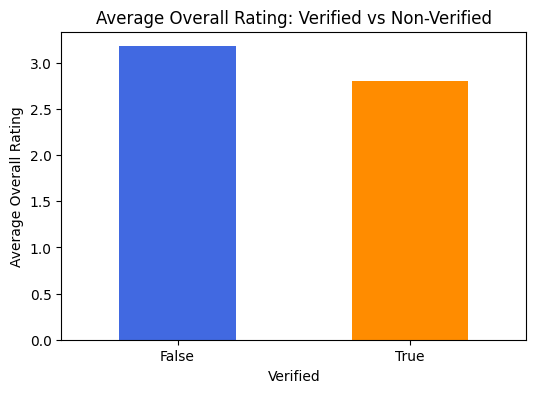

In [46]:
# Bar chart of average ratings
plt.figure(figsize=(6,4))
verified_rating_summary["mean"].plot(
    kind="bar",
    color=["royalblue", "darkorange"]
)
plt.title("Average Overall Rating: Verified vs Non-Verified")
plt.xlabel("Verified")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=0)
plt.show()

## Q.8::How do service ratings differ between Recommended = Yes and Recommended = No reviews?

In [47]:
service_cols = [
    "seat_comfort",
    "cabin_staff_service",
    "food_and_beverages",
    "ground_service",
    "inflight_entertainment",
    "wifi_and_connectivity",
    "value_for_money"
]
service_reco_summary = (
    airline_data
    .groupby("recommended")[service_cols]
    .mean()
)
print("Average Service Ratings by Recommendation Status:\n")
print(service_reco_summary)

Average Service Ratings by Recommendation Status:

             seat_comfort  cabin_staff_service  food_and_beverages  \
recommended                                                          
False            1.633118             1.853140            1.496501   
True             3.940029             4.412046            3.756813   

             ground_service  inflight_entertainment  wifi_and_connectivity  \
recommended                                                                  
False              1.339745                1.569645               1.425499   
True               4.249028                3.779007               3.750259   

             value_for_money  
recommended                   
False               1.314268  
True                4.362472  


<Figure size 1200x600 with 0 Axes>

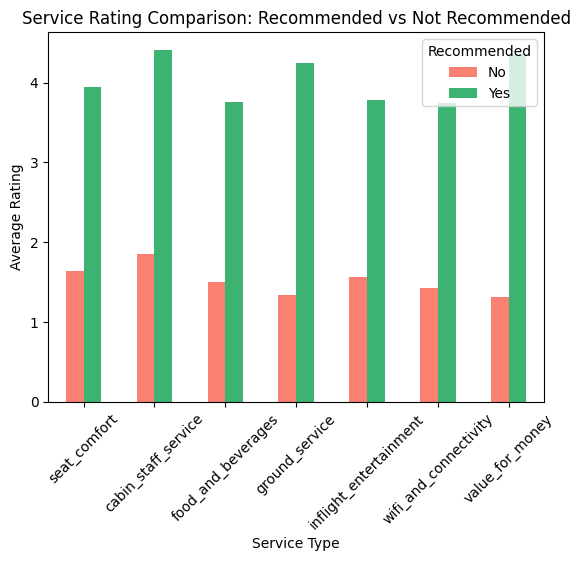

In [48]:
# Bar plot for comparison
plt.figure(figsize=(12,6))
service_reco_summary.T.plot(
    kind="bar",
    color=["salmon", "mediumseagreen"]
)
plt.title("Service Rating Comparison: Recommended vs Not Recommended")
plt.xlabel("Service Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend(title="Recommended", labels=["No", "Yes"])
plt.show()

<Figure size 1400x600 with 0 Axes>

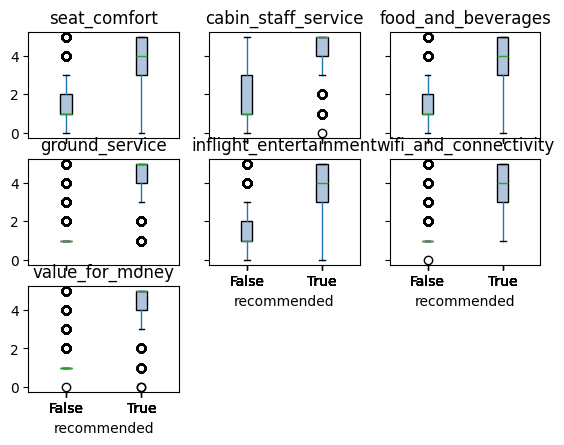

In [49]:
# Boxplots for each service rating split by recommendation
plt.figure(figsize=(14,6))
airline_data.boxplot(
    column=service_cols,
    by="recommended",
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightsteelblue")
)
plt.suptitle("")
plt.title("Distribution of Service Ratings by Recommendation Status")
plt.xlabel("Recommended")
plt.ylabel("Rating")
plt.show()

## Q.9::Is there a statistically significant difference in Overall_Rating between passengers who recommend the airline and those who do not recommend it?

 Null Hypothesis (H0):
 There is no statistically significant difference in Overall_Rating
 between Recommended and Not Recommended reviews.

 Alternative Hypothesis (H1):
 There is a statistically significant difference in Overall_Rating
 between Recommended and Not Recommended reviews.

In [50]:
# Split data into two groups
recommended_yes = airline_data.loc[
    airline_data["recommended"] == True, "overall_rating"
]

recommended_no = airline_data.loc[
    airline_data["recommended"] == False, "overall_rating"
]

# Print group statistics
print("Group Statistics:\n")

print("Recommended = Yes")
print(recommended_yes.describe(), "\n")

print("Recommended = No")
print(recommended_no.describe(), "\n")

# Two-sample t-test (Welch’s t-test)
t_stat, p_value = stats.ttest_ind(
    recommended_yes,
    recommended_no,
    equal_var=False,
    nan_policy="omit"
)

# Print test results
print("Hypothesis Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Decision rule
alpha = 0.05
if p_value < alpha:
    print("Decision: Reject H0 (statistically significant difference exists).")
else:
    print("Decision: Fail to reject H0 (no statistically significant difference).")

Group Statistics:

Recommended = Yes
count    4919.000000
mean        5.869892
std         3.435241
min         2.000000
25%         2.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: overall_rating, dtype: float64 

Recommended = No
count    24148.000000
mean         2.418503
std          0.924190
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: overall_rating, dtype: float64 

Hypothesis Test Results:
T-statistic: 69.9515
P-value: 0.000000
Decision: Reject H0 (statistically significant difference exists).


## Conclusions from Hypothesis Testing

There is a statistically significant difference in Overall_Rating between passengers who recommend the airline and those who do not.

Passengers who recommend the airline report a much higher average Overall_Rating compared to passengers who do not recommend it.

The difference in ratings is not due to random variation, as indicated by the extremely low p-value.

Recommendation behavior is strongly associated with overall passenger satisfaction.

The magnitude of the difference in mean ratings suggests the result is practically meaningful, not just statistically significant.

This outcome justifies further analysis to understand which service factors influence Overall_Rating.

The null hypothesis is rejected, confirming that Overall_Rating varies significantly by recommendation status.

## Q.10::Can passengers be grouped into distinct clusters based on their service ratings (Seat Comfort, Cabin Staff Service, Food & Beverages, Ground Service, Inflight Entertainment, Wifi & Connectivity, Value For Money)?

Clustering Data Shape:
(11187, 7)

Elbow Method Inertia Values:
k=2, inertia=33139.66
k=3, inertia=24800.75
k=4, inertia=21794.85
k=5, inertia=19857.54
k=6, inertia=18597.76
k=7, inertia=17436.44


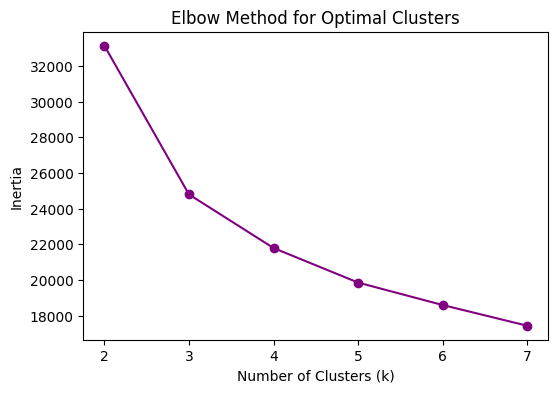


Cluster Sizes:
cluster
0    1500
1    7237
2    2450
Name: count, dtype: int64

Cluster-wise Average Service Ratings:

         seat_comfort  cabin_staff_service  food_and_beverages  \
cluster                                                          
0            4.276667             4.591333            4.154000   
1            1.237391             1.399889            1.110129   
2            2.662449             3.035510            2.364898   

         ground_service  inflight_entertainment  wifi_and_connectivity  \
cluster                                                                  
0              4.384000                4.310667               4.094667   
1              1.146193                1.120492               1.093547   
2              1.977959                2.590204               2.305306   

         value_for_money  
cluster                   
0               4.449333  
1               1.130026  
2               1.921633  


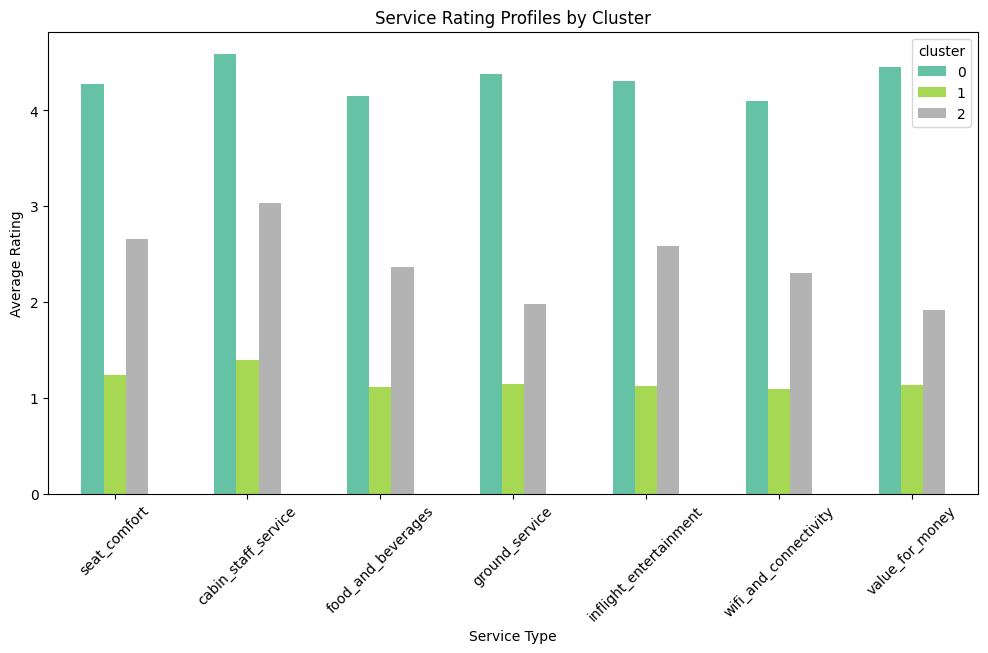

In [51]:
# Select service rating columns
service_cols = [
    "seat_comfort",
    "cabin_staff_service",
    "food_and_beverages",
    "ground_service",
    "inflight_entertainment",
    "wifi_and_connectivity",
    "value_for_money"
]

# Filter rows where all selected service ratings are available
cluster_data = airline_data[service_cols].dropna()

print("Clustering Data Shape:")
print(cluster_data.shape)

# Standardize the data
scaled_data = StandardScaler().fit_transform(cluster_data)

# Elbow method to find optimal number of clusters
inertia = []
k_range = range(2, 8)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

print("\nElbow Method Inertia Values:")
for k, val in zip(k_range, inertia):
    print(f"k={k}, inertia={val:.2f}")

# Elbow plot
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker="o", color="purple")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Fit KMeans with chosen k (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Attach cluster labels
clustered_df = cluster_data.copy()
clustered_df["cluster"] = clusters

# Print cluster sizes
print("\nCluster Sizes:")
print(clustered_df["cluster"].value_counts().sort_index())

# Cluster-wise average service ratings
cluster_profile = clustered_df.groupby("cluster").mean()

print("\nCluster-wise Average Service Ratings:\n")
print(cluster_profile)

# Bar plot: cluster profiles
cluster_profile.T.plot(
    kind="bar",
    figsize=(12,6),
    colormap="Set2"
)
plt.title("Service Rating Profiles by Cluster")
plt.xlabel("Service Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [53]:
from sqlalchemy import create_engine


username = "postgres"


password = "Papu1993"


host     = "localhost"


port     = "5432"


database = "US Airlines.db"          


engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)


table_name = "airline_review"


airline_data.to_sql(table_name, engine, if_exists="replace", index=False)


print(f"Data successfully loaded into table: {table_name}")

Data successfully loaded into table: airline_review
